In [71]:
import pandas as pd
import matplotlib.pylab as plt
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [72]:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [73]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [74]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [75]:
df["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)

In [106]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price","stroke","bore","horsepower","peak-rpm","num-of-doors"],axis=0,inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

# df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)

In [107]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.455135,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.455135,1.000000,-0.043395,0.033177,0.093666,-0.355796,0.108699,0.142821,-0.025608,0.054589,-0.112980,0.213594,-0.208081,-0.166290,0.138700
wheel-base,-0.536516,-0.043395,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.033177,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.093666,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.355796,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.108699,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.142821,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.025608,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.054589,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,-0.068420,-0.031248,-0.040274,0.096007


In [108]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [109]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

(0.0, 54238.3738675425)

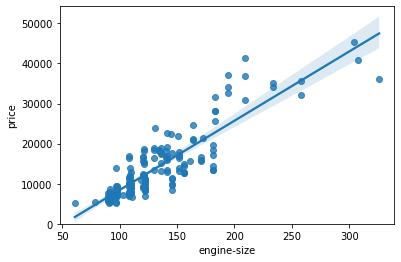

In [110]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

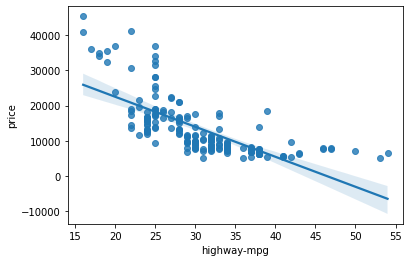

In [111]:
sns.regplot(x="highway-mpg", y="price", data=df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

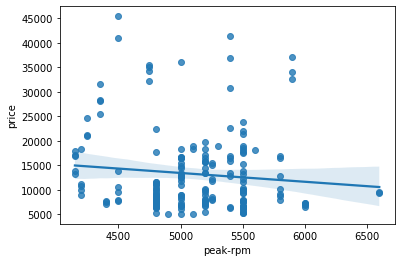

In [112]:
sns.regplot(x="peak-rpm", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

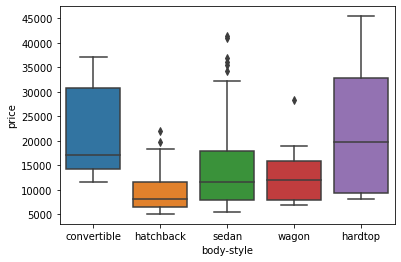

In [113]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

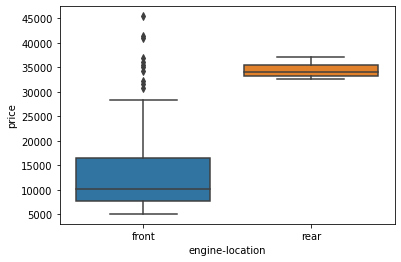

In [114]:
sns.boxplot(x="engine-location", y="price", data=df)


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [117]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [118]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    

symboling
False    193
Name: symboling, dtype: int64

normalized-losses
False    193
Name: normalized-losses, dtype: int64

make
False    193
Name: make, dtype: int64

fuel-type
False    193
Name: fuel-type, dtype: int64

aspiration
False    193
Name: aspiration, dtype: int64

num-of-doors
False    193
Name: num-of-doors, dtype: int64

body-style
False    193
Name: body-style, dtype: int64

drive-wheels
False    193
Name: drive-wheels, dtype: int64

engine-location
False    193
Name: engine-location, dtype: int64

wheel-base
False    193
Name: wheel-base, dtype: int64

length
False    193
Name: length, dtype: int64

width
False    193
Name: width, dtype: int64

height
False    193
Name: height, dtype: int64

curb-weight
False    193
Name: curb-weight, dtype: int64

engine-type
False    193
Name: engine-type, dtype: int64

num-of-cylinders
False    193
Name: num-of-cylinders, dtype: int64

engine-size
False    193
Name: engine-size, dtype: int64

fuel-system
False    193
Name: fuel-syst

In [119]:
X = df[['highway-mpg']]
Y = df['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [120]:
print(lm.intercept_)
print(lm.coef_)

39558.84906753883
[-853.39075564]


In [121]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [122]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

(0.0, 47414.1)

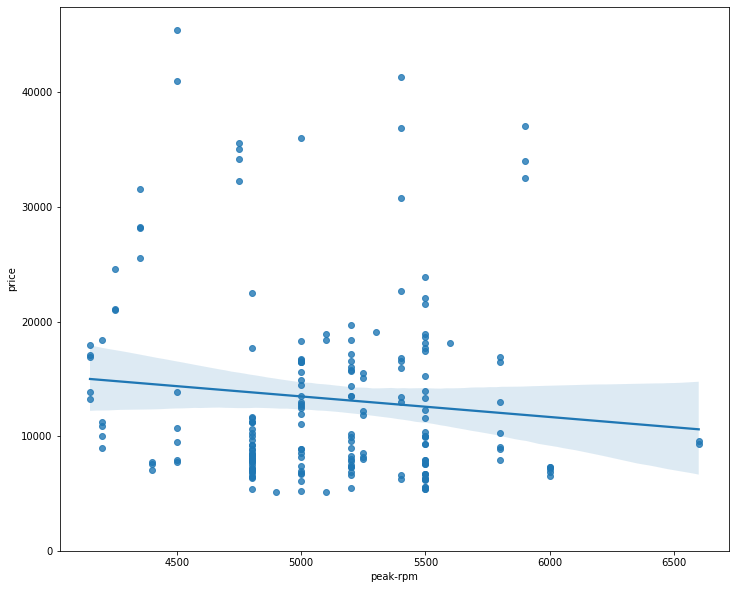

In [124]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


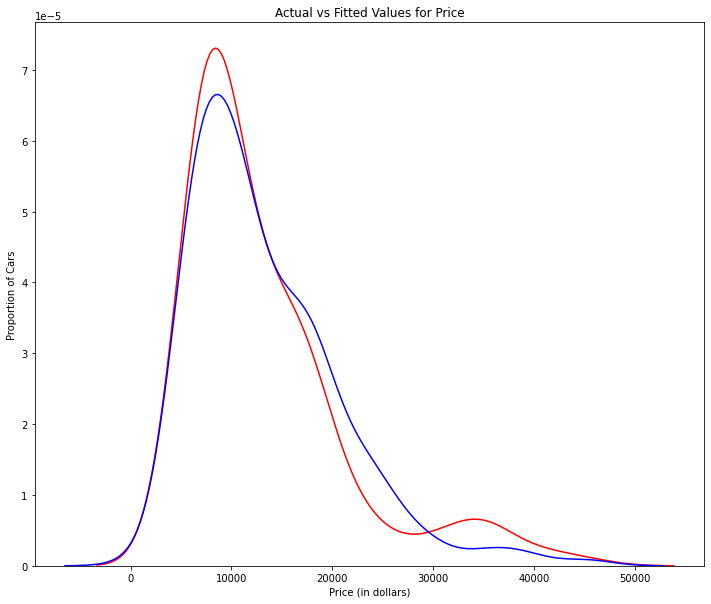

In [125]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()


In [128]:
#We will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [129]:
x = df['highway-mpg']
y = df['price']
#Let's fit the polynomial using the function polyfit,then use the function to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.453 x + 195.3 x - 8727 x + 1.367e+05


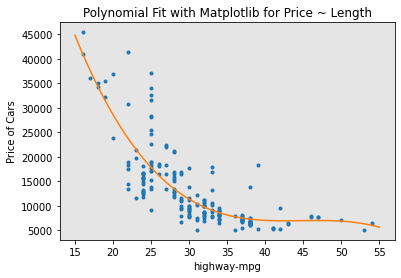

In [130]:
PlotPolly(p, x, y, 'highway-mpg')

In [136]:
#engine size 
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.7899272137265414

In [137]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
Yhat[0:4]

array([13609.25385172, 13609.25385172, 17412.21477552,  9979.1547881 ])

In [138]:
#import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
mse

13674526.15852682

In [139]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.820780211525732

In [135]:
# Produce a prediction 
Y_predict_multifit = lm.predict(Z)
# Compare the predicted results with the actual results
# The mean square error of price and predicted value using multifit is: 
mean_squared_error(df['price'], Y_predict_multifit)

11666174.039443672